In [1]:
import torch
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':18})

In [2]:
x = torch.linspace(-5,5,101)

In [3]:
def activation_out(act_func : str, optional_param=None):
    
    #obtenemos el tipo de función de activación
    act_func = getattr(torch.nn.functional, act_func)
    #podemos acceder a funciones de torch.nn.functional o (torch)
    # ejemplo: getattr(torch, "relu") obtiene la función ReLU de PyTorch
    
    if optional_param!=None:
        return act_func(x, optional_param)
    else:
        return act_func(x)

Veamos un ejemplo con `leaky_relu`:

$\large{\phi(x) = \max(\underline{\alpha} x,x)} = \begin{cases}
      \underline{\alpha} \cdot x, & x < 0 \\
      x, & \text{otherwise}
   \end{cases}\\
$

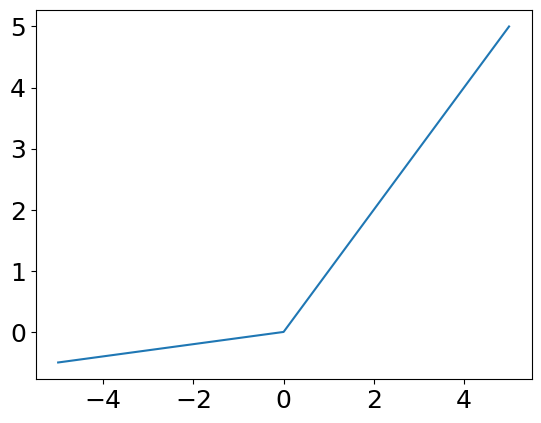

In [4]:
plt.plot(x, activation_out("leaky_relu", 0.1));
#para valores negativos, establecemos una pequeña pendiente constante de alpha=0.1

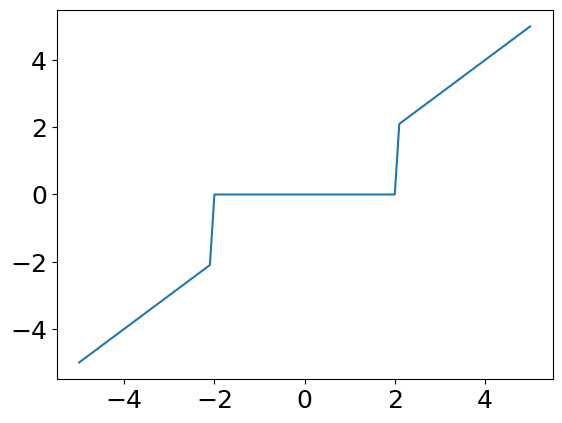

In [5]:
plt.plot(x, activation_out("hardshrink",2)); 
#x si x > parámetro lambda o x < −lambda, de lo contrario 0

In [6]:
import numpy as np

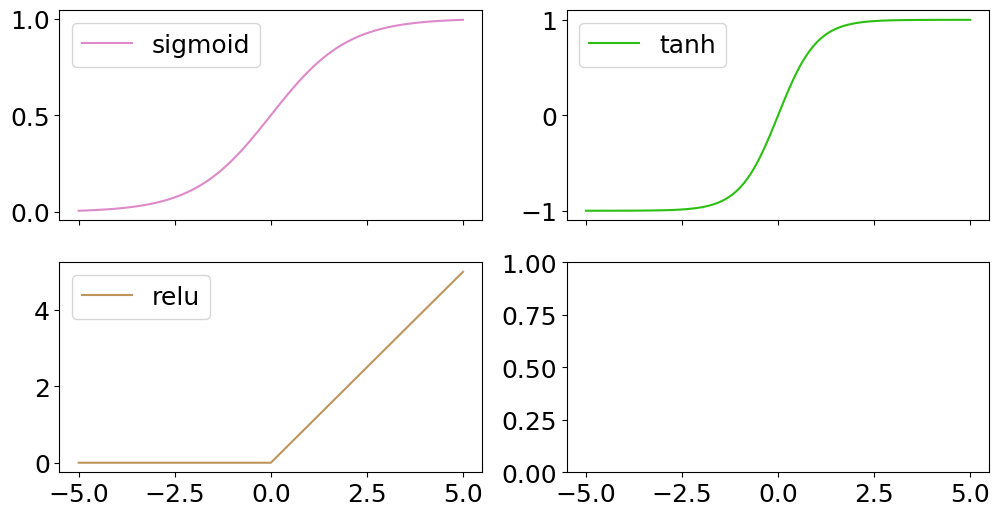

In [7]:
activation_funcs = ["sigmoid", "tanh", "relu"]
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True,
                       figsize=(12,6))

axs = axs.flatten()

for idx, act_func in enumerate(activation_funcs):
    
    axs[idx].plot(x, activation_out(act_func), label=act_func, color=(np.random.rand(), np.random.rand(),
                                                                          np.random.rand()))
    axs[idx].legend()
    
    

Veamos las ditribuciones resultantes de pasar un vector $\large{\vec x \in [-5,5]}$ a través de cada función de activación

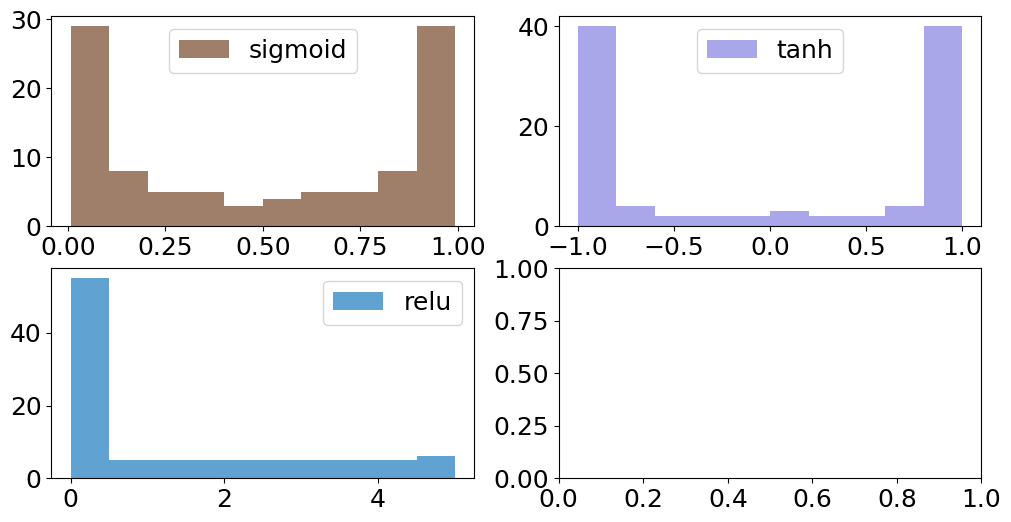

In [8]:
activation_funcs = ["sigmoid", "tanh", "relu"]
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False,
                       figsize=(12,6))

axs = axs.flatten()

for idx, act_func in enumerate(activation_funcs):
    
    axs[idx].hist(activation_out(act_func), label=act_func, color=(np.random.rand(), np.random.rand(),
                                                                          np.random.rand()))
    axs[idx].legend()

In [4]:
def activation(act_func : str):
    
    act_func = getattr(torch.nn.functional, act_func)
    
    return act_func
    

In [10]:
torch.nn.functional.rrelu(torch.ones(1,1))

tensor([[1.]])

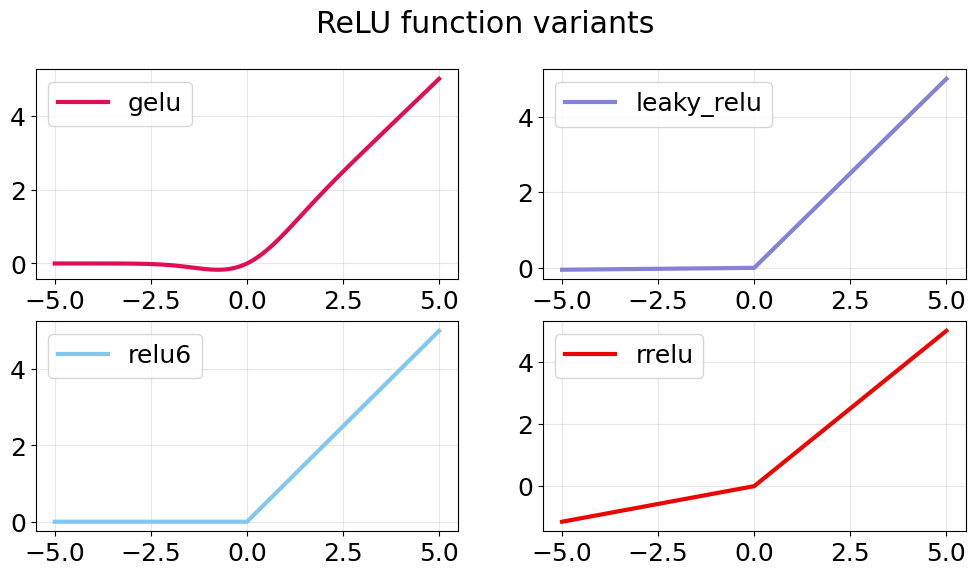

In [11]:
relu_variants = ["gelu", "leaky_relu", "relu6", "rrelu"]
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False,
                       figsize=(12,6))

fig.suptitle("ReLU function variants")
axs = axs.flatten()

for idx, act_func in enumerate(relu_variants):
    
    axs[idx].plot(x, activation(act_func)(x),
                  label=act_func, color=(np.random.rand(), np.random.rand(),
                                         np.random.rand()),
                 linewidth=3)
    axs[idx].legend()
    axs[idx].grid(alpha=0.3)

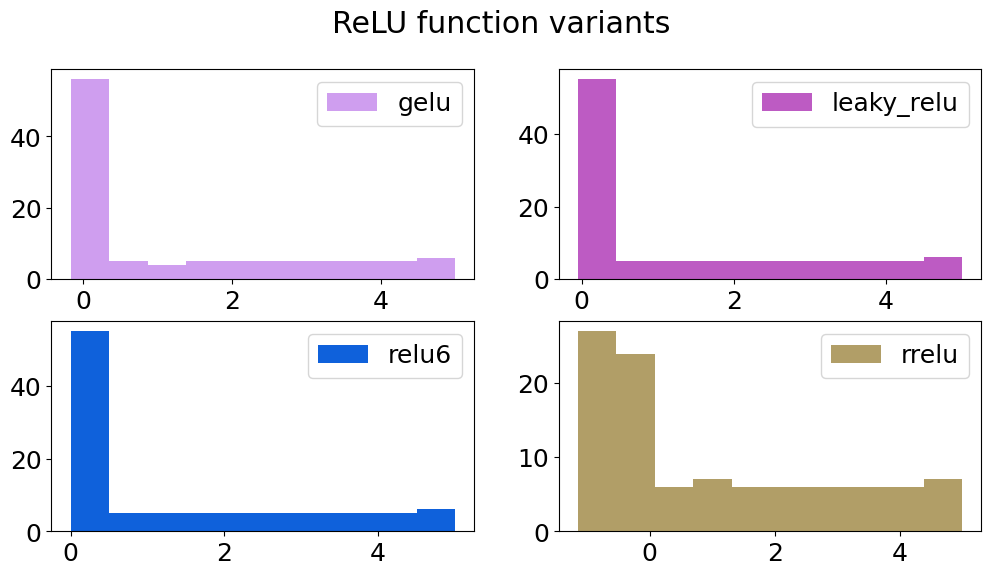

In [12]:
relu_variants = ["gelu", "leaky_relu", "relu6", "rrelu"]
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False,
                       figsize=(12,6))

fig.suptitle("ReLU function variants")
axs = axs.flatten()

for idx, act_func in enumerate(relu_variants):
    
    axs[idx].hist(activation(act_func)(x), label=act_func,
                  color=(np.random.rand(), np.random.rand(),np.random.rand()))
    
    axs[idx].legend()

Veamos en detalle la función `ReLU6`
$\large{\theta(x) = \max(0,x)} = \begin{cases}
      6, & \text{if } x > 6 \\
      \max(0,x), & \text{otherwise}
   \end{cases}\\
   $

La función aplica ReLU(x) si x<6, a partir de 6 se establece dicho valor fijo, evitando saturarse

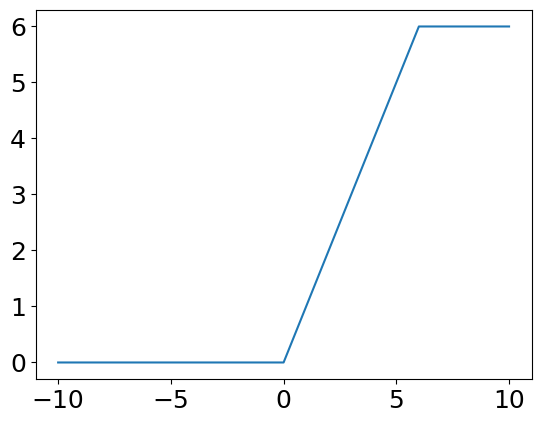

In [13]:
x = torch.linspace(-10,10, 101)
plt.plot(x,activation_out("relu6"));

Y esta otra función llamada `swish` que tan solo realiza la multiplicación $\large{\sigma(x) \cdot x}$ donde $\sigma$ es la función sigmoide

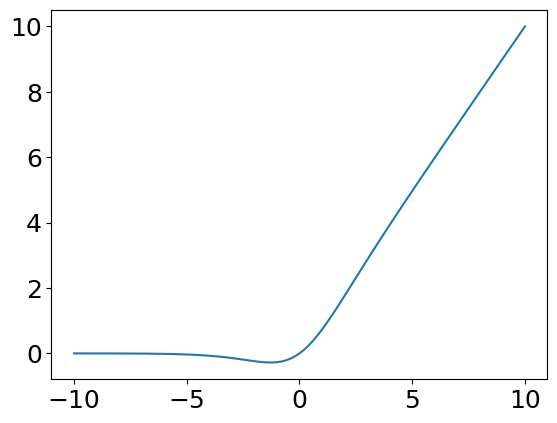

In [14]:
plt.plot(x, activation_out("silu"));

https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

In [5]:
%matplotlib inline
from ipywidgets import interactive

In [6]:
def nn_out(w1_hid, w2_hid, w3_hid, w4_hid, w1_out, w2_out, b):
    
    x1 = torch.linspace(-3,3, 100)
    x2 = torch.sin(x1)*0.03*torch.pi + x1*0.03 + torch.cos(x1) 
    
    hid1_lin = x1*w1_hid + x2*w2_hid -0.79
    hid2_lin = x1*w3_hid + x2*w4_hid
    
    hid1_out = torch.nn.functional.tanh(hid1_lin)
    hid2_out = torch.nn.functional.tanh(hid2_lin)
    
    out_lin = w1_out*hid1_lin + w2_out*hid2_lin + b
    
    out = torch.nn.functional.tanh(out_lin)
    
    plt.plot(x1,x2, label="Data")
    plt.plot(x1, out, label="NN output")
    plt.legend()
    plt.ylim(-5,5)
    

In [7]:
from ipywidgets import interact

In [ ]:
interact(nn_out, w1_hid=(-5,5, 0.1), w2_hid=(-5,5, 0.1), w3_hid=(-5,5, 0.1),
         w4_hid=(-5,5, 0.1), w1_out=(-5,5, 0.1), w2_out=(-5,5, 0.1), b=(-10,10))

In [ ]:
def nn_out(w1, w2):
    
    x1 = torch.linspace(-3,3, 100)
    x2 = 2*x1
    
    lin = x1*w1 + x2*w2

    # y aplicamos la función no-lineal
    y = torch.relu(lin)

    plt.plot(x1,lin,'bo-',label='Linear input')
    plt.plot(x1,y,'rs',label='Non Linear output')
    plt.legend()
    plt.show()
    
    
    

In [ ]:
from ipywidgets import interact

In [ ]:
interact(nn_out, w1=(-5,5), w2=(-10,10))

In [ ]:
#simulamos dos vectores de entrada
x1 = torch.linspace(-1,1,20)
x2 = 2*x1

# y sus pesos correspondientes
w1 = -.3
w2 = .5

# hacemos la combinación lineal (producto punto)
lin = x1*w1 + x2*w2

# y aplicamos la función no-lineal
y = torch.relu(lin)

plt.plot(x1,lin,'bo-',label='Linear input')
plt.plot(x1,y,'rs',label='Non Linear output')
plt.ylabel('$\\hat{y}$ (output of ReLU(x))')
plt.xlabel('x1 variable')
plt.legend()
plt.show()